In [108]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
%matplotlib inline

In [109]:
date_cols = ['Join Date', 'End Date',]

def date_parser(x): 
    try:
        ans = pd.datetime.strptime(str(x), '%b-%y')
    except ValueError:
        ans = pd.NaT
    return ans

df = pd.read_csv('C:/Users/jiaqi/Downloads/subscriptionsdataFINAL.csv', 
                 parse_dates=date_cols, 
                 date_parser=date_parser,
                 # index_col=['End Date']
                ).replace(pd.NaT, np.nan).sort_values(by='End Date')

C:\Users\jiaqi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [110]:
join_dates = df['Join Date'].unique()

In [111]:
#First Cohort Everone that started in 2009-05-01
start_date_1 = join_dates[0] # '2009-05-01' # our first cohort
mask = (df['Join Date'] == start_date_1) 
df_1 = df[mask]
df_1

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear
539659,Hounslow,2009-05-01,A,Male,Flexible,2009-05-01,539660,1970
128370,Hounslow,2009-05-01,A,Female,Flexible,2009-05-01,128371,1981
120066,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,120067,1972
602505,Hounslow,2009-05-01,C1,Male,Flexible,2009-05-01,602506,1983
707592,Hounslow,2009-05-01,C1,Female,Flexible,2009-05-01,707593,1976
...,...,...,...,...,...,...,...,...
679772,Hounslow,2009-05-01,C2,Male,Standard,2010-11-01,679773,1976
812476,Hounslow,2009-05-01,A,Male,Standard,2011-01-01,812477,1967
697891,Hounslow,2009-05-01,A,Male,Standard,2011-02-01,697892,1979
617191,Hounslow,2009-05-01,C1,Male,Standard,2011-04-01,617192,1975


In [112]:
end_dates = df_1['End Date'].unique()

In [117]:
#proportion 2019-05-01 cohort those who leaves at each date
female= df_1[df_1['Gender']== 'Female']
survival_1 = (female[['End Date','CustomerID']].groupby(['End Date']).count() / len(female)).rename(columns={'CustomerID': 'female'})
survival_1['Female']= 1 - survival_1.iloc[1:].cumsum()
df_f= survival_1.reset_index()

#Male
male= df_1[df_1['Gender']== 'Male']
survival_2 = (male[['End Date','CustomerID']].groupby(['End Date']).count() / len(male)).rename(columns={'CustomerID': 'male'})
survival_2['Male']= 1 - survival_2.iloc[1:].cumsum()
df_m=survival_2.reset_index()

df2= pd.merge( left= df_f, right= df_m, on='End Date')
df2.drop(['female', 'male'], axis=1, inplace=True)
df2

,End Date,Female,Male
0,2009-05-01,NaN,NaN
1,2009-06-01,0.968927,0.968116
2,2009-07-01,0.731638,0.681159
3,2009-08-01,0.542373,0.463768
4,2009-09-01,0.409605,0.347826
5,2009-10-01,0.313559,0.269565
6,2009-11-01,0.251412,0.202899
7,2009-12-01,0.183616,0.168116
8,2010-01-01,0.146893,0.142029
9,2010-02-01,0.110169,0.130435


<AxesSubplot:xlabel='End Date'>

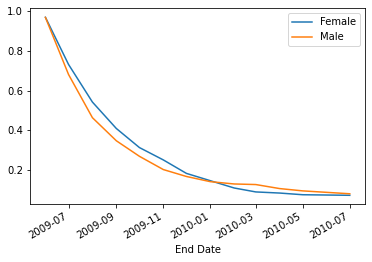

In [119]:
#Survival Curve Gender
df2.plot(x='End Date', y=['Female', 'Male'])